# Custom features from Pandas
See Pandas help here :https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html



## Librairies

In [101]:
#import librairies
import pandas
from pandas import read_csv
import matplotlib.pyplot as plt


## Modules

In [60]:
# header of columns, stats
def print_stat(df,s):
            switcher={
                1: df.info(),
                2: df.describe(),
                3: df.head(5),
                4: df.dtypes
            }
            return switcher.get(s,"Invalid day of week")

In [8]:
#plot Historgramme & Distribution
def hist_features(df,feat): 
    df[feat].plot(kind='hist')
    plt.xlabel(feat)

In [157]:
#Insert new features (new columns)
def new_dataset(df):
    df['NumberOfTimes90DaysLate_TOTAL'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse']+df['NumberOfTimes90DaysLate']
    df['IsOld']=df['age']>70
    df_new = df
    return df_new

## Core pgm

In [98]:
#Load databases .cvs
df = read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv', index_col = False)
print_stat(df,1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
SeriousDlqin2yrs                        150000 non-null int64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [88]:
nb = df.shape[1]
df_output=df[df.columns[nb-1]]
df_output.describe()

count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [102]:
nb = df.shape[1]
df_ex_output =  df[df.iloc[:,1]]
df_ex_output.info()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-57fdbc105ae5>", line 2, in <module>
    df_ex_output =  df[df.iloc[:,1]]
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py", line 2934, in __getitem__
    raise_missing=True)
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py", line 1354, in _convert_to_indexer
    return self._get_listlike_indexer(obj, axis, **kwargs)[1]
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py", line 1161, in _get_listlike_indexer
    raise_missing=raise_missing)
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py", line 1246, in _validate_read_indexer
    key=key, axis=self.obj._get_axis_name(axis)))
KeyError: "None of [Float64Index([  0.7661266090000001,   0.9571510190000001,           0.65818014,\n              

KeyError: "None of [Float64Index([  0.7661266090000001,   0.9571510190000001,           0.65818014,\n               0.23380977600000002,            0.9072394,  0.21317868199999998,\n                       0.305682465,          0.754463648,          0.116950644,\n                       0.189169052,\n              ...\n              0.055518162999999995,            0.1041117,          0.871975945,\n                0.9999998999999999,          0.385742265,          0.040673864,\n                       0.299745148,          0.246043918,                  0.0,\n                       0.850282951],\n             dtype='float64', length=150000)] are in the [columns]"

In [91]:
#Custom features and print new  training set
df_new = new_dataset(df)
print_stat(df_new,1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-91-79429eda6698>", line 2, in <module>
    df_new = new_dataset(df)
NameError: name 'new_dataset' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/ultr

NameError: name 'new_dataset' is not defined

In [132]:
#Put the "output" at the end of the column
new_order = [0,1,2,3,4,5,6,7,8,9,11,12,10]
df1= df[df.columns[new_order]]  
df1.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
NumberOfTimes90DaysLate_TOTAL             int64
IsOld                                      bool
SeriousDlqin2yrs                          int64
dtype: object

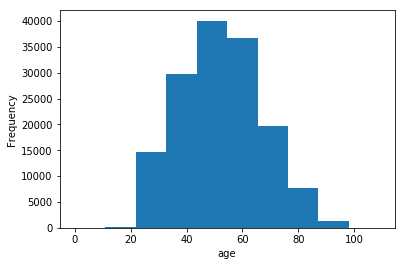

In [152]:
# plot features
hist_features(df1,'age')

In [70]:
#Create .csv
df.to_csv('Train_Full_New2.csv')